In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


In [2]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from mlxtend.feature_selection import ExhaustiveFeatureSelector 
from sklearn.linear_model import LinearRegression

### a)

In [32]:
n_features = 10
n_observations = 1000

X = np.random.randn(n_observations, n_features)
beta = np.array([1.5, -2, 0, 0, 3, 0, 0, 0, 2, 0,])


epsilon = np.random.normal(loc=0, scale=0.5, size=n_observations)

y = X @ beta + epsilon

y[:20]


array([-0.44030717,  4.55010367,  1.83603764, -0.67392481, -1.77475749,
       -1.10553056, -1.83318553,  4.50533313, -4.75459048,  6.29125919,
       -4.98358207,  6.98028967, -2.5935872 , -3.47819958, -7.85908461,
       -2.10710657, -1.50813635,  2.82766377,  1.39610295, -0.67899407])

### b)

In [4]:
validation = ShuffleSplit(n_splits=1, train_size=100, random_state=3)

### c)

In [5]:
ols = LinearRegression()

efs1 = ExhaustiveFeatureSelector(
    ols,
    min_features=1,
    max_features=n_features,
    scoring="neg_mean_squared_error",
    print_progress=True,
    cv=validation,
    
)

efs1.fit(X, y)

Features: 1023/1023

ExhaustiveFeatureSelector(cv=ShuffleSplit(n_splits=1, random_state=3, test_size=None, train_size=100),
                          estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9]],
                          max_features=10, scoring='neg_mean_squared_error')

In [6]:
efs1.get_metric_dict()


c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


c:\Users\PC\Documents\envs\islp_py310\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{0: {'feature_idx': (0,),
  'cv_scores': array([-17.86714315]),
  'avg_score': -17.867143154965245,
  'feature_names': ('0',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 1: {'feature_idx': (1,),
  'cv_scores': array([-14.82003911]),
  'avg_score': -14.820039112222908,
  'feature_names': ('1',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (2,),
  'cv_scores': array([-18.74786453]),
  'avg_score': -18.74786452629632,
  'feature_names': ('2',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (3,),
  'cv_scores': array([-18.86390531]),
  'avg_score': -18.86390531498709,
  'feature_names': ('3',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (4,),
  'cv_scores': array([-10.26065687]),
  'avg_score': -10.260656867951113,
  'feature_names': ('4',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (5,),
  'cv_scores': array([-18.7433772]),
  'avg_score': -18.74337

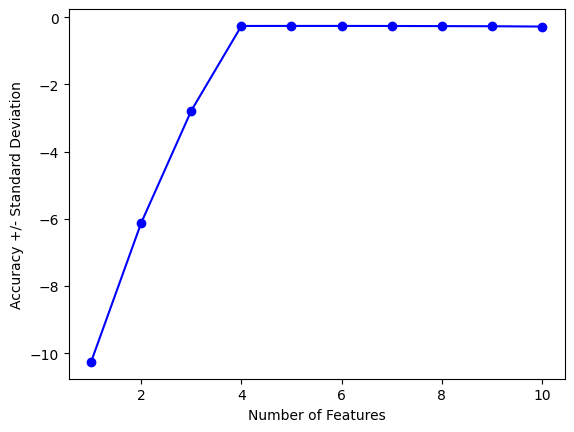

In [7]:

metric_dict = efs1.get_metric_dict()

best_model_for_each_size = dict()

k_feat = sorted(metric_dict.keys())

for k in k_feat:
    size = len(metric_dict[k]["feature_idx"])

    if size not in best_model_for_each_size.keys():
        best_model_for_each_size[size] = metric_dict[k]
        continue

    current_best_model_score = best_model_for_each_size[size]["avg_score"]
    loop_model_score = metric_dict[k]["avg_score"]

    if loop_model_score > current_best_model_score:
        best_model_for_each_size[size] = metric_dict[k]

    
avg = [best_model_for_each_size[k]['avg_score'] for k in best_model_for_each_size]

fig = plt.figure()

plt.plot(best_model_for_each_size.keys(), avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
plt.show()

### e)

In [8]:
best_model_for_each_size

## The best model is that has 6 features

{1: {'feature_idx': (4,),
  'cv_scores': array([-10.26065687]),
  'avg_score': -10.260656867951113,
  'feature_names': ('4',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (1, 4),
  'cv_scores': array([-6.12417466]),
  'avg_score': -6.124174658684304,
  'feature_names': ('1', '4'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (1, 4, 8),
  'cv_scores': array([-2.78390764]),
  'avg_score': -2.783907642775991,
  'feature_names': ('1', '4', '8'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 1, 4, 8),
  'cv_scores': array([-0.26154981]),
  'avg_score': -0.2615498068411332,
  'feature_names': ('0', '1', '4', '8'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 1, 4, 8, 9),
  'cv_scores': array([-0.26047389]),
  'avg_score': -0.2604738936658438,
  'feature_names': ('0', '1', '4', '8', '9'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 6: {'feature_idx':

### f)

In [9]:
best_model_for_each_size[6]

{'feature_idx': (0, 1, 4, 5, 8, 9),
 'cv_scores': array([-0.26042232]),
 'avg_score': -0.26042232092525,
 'feature_names': ('0', '1', '4', '5', '8', '9'),
 'ci_bound': nan,
 'std_dev': 0.0,
 'std_err': nan}

It has the subset of the true features but with the addition of the columns 5 and 9.

### g)

k=1, coeff_mse=0.019345221867424378
k=2, coeff_mse=0.10484507467788551
k=3, coeff_mse=0.07996712912023085
k=4, coeff_mse=0.05864817814692658
k=5, coeff_mse=0.07330454196398714
k=6, coeff_mse=0.10395566129046407
k=7, coeff_mse=0.10662654827837251
k=8, coeff_mse=0.11066494903500557
k=9, coeff_mse=0.13014968514424402
k=10, coeff_mse=0.14201204632875994


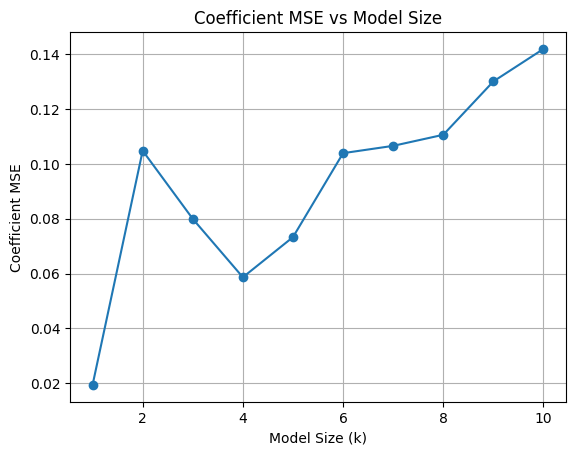

In [75]:
coeff_mse_list = []
for k in best_model_for_each_size.keys():

    model = best_model_for_each_size[k]
    x_ = X[:,model["feature_idx"]]

    ols.fit(x_, y)

    model["coefficients"] = ols.coef_

    coeff_mse = np.sum(((beta[list(model["feature_idx"])] - ols.coef_)**2)**(1/2))

    coeff_mse_list.append(coeff_mse)
    print(f"k={k}, coeff_mse={coeff_mse}")

# Plotting coeff_mse against k
ks = list(best_model_for_each_size.keys())

plt.plot(ks, coeff_mse_list, marker='o')
plt.xlabel('Model Size (k)')
plt.ylabel('Coefficient MSE')
plt.title('Coefficient MSE vs Model Size')
plt.grid(True)
plt.show()